<a href="https://colab.research.google.com/github/tasdid25/Machine-learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
df  = pd.read_csv('student_marks.csv')

In [ ]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [ ]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

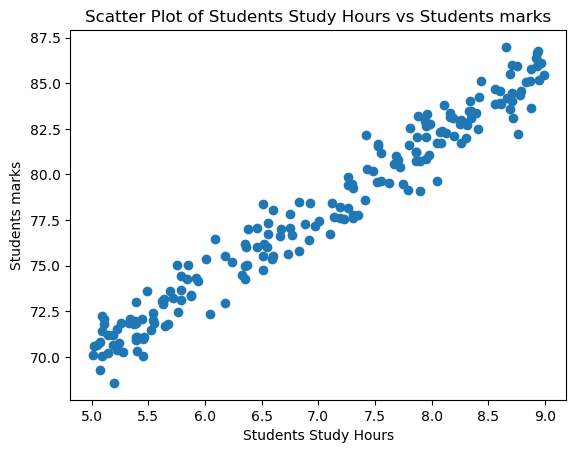

In [ ]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms

In [ ]:
# Data Cleaning

In [ ]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.study_hours.mean()

6.9959487179487185

In [ ]:
df2 = df.fillna(df.study_hours.mean())

In [ ]:
df2.isnull().sum()

,0
study_hours,0
student_marks,0


In [ ]:
# split dataset

In [ ]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [ ]:
X_train.head()

,study_hours
134,6.51
173,5.22
104,7.23
11,8.56
195,7.53


In [ ]:
y_train.head()

,student_marks
134,78.39
173,70.40
104,77.55
11,83.88
195,81.67


In [ ]:
X_test.head()

,study_hours
105,6.46
18,8.41
75,6.04
28,5.94
12,7.75


In [ ]:
y_test.head()

,student_marks
105,77.07
18,82.50
75,72.33
28,74.15
12,79.50


# Select a model and train it

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([3.89210403])

In [ ]:
lr.intercept_

50.729712538379935

In [ ]:
#bruteforce
m = 3.88053494
c = 50.7800939602552
z  = m * 40 + c
z

206.0014915602552

In [ ]:
lr.predict([[40]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([206.00149164])

In [ ]:
y_pred  = lr.predict(X_test)
y_pred

array([75.87270458, 83.46230744, 74.23802089, 73.84881048, 80.89351878,
       72.68117927, 71.90275847, 70.92973246, 82.8395708 , 77.95867274,
       76.06730978, 72.29196887, 77.50738827, 74.12125777, 75.56133626,
       85.25267529, 81.32165022, 83.034176  , 85.48620154, 72.9925476 ,
       70.46267998, 73.14823176, 70.92973246, 77.95867274, 81.32165022,
       85.52512258, 70.9686535 , 80.03725589, 85.48620154, 70.73512726,
       72.64225823, 81.47733438, 70.54052206, 85.29159633, 75.44457314,
       82.87849184, 84.90238593, 71.47462702, 75.48349418, 80.58215046])

In [ ]:
temp = np.c_[X_test, y_test, y_pred]
#np.c_ is a NumPy function that concatenate arrays along the second axis (column-wise)
temp

array([[ 6.46      , 77.07      , 75.87270458],
       [ 8.41      , 82.5       , 83.46230744],
       [ 6.04      , 72.33      , 74.23802089],
       [ 5.94      , 74.15      , 73.84881048],
       [ 7.75      , 79.5       , 80.89351878],
       [ 5.64      , 73.19      , 72.68117927],
       [ 5.44      , 72.08      , 71.90275847],
       [ 5.19      , 71.18      , 70.92973246],
       [ 8.25      , 82.79      , 82.8395708 ],
       [ 6.99594872, 77.27      , 77.95867274],
       [ 6.51      , 75.52      , 76.06730978],
       [ 5.54      , 72.38      , 72.29196887],
       [ 6.88      , 77.29      , 77.50738827],
       [ 6.01      , 75.36      , 74.12125777],
       [ 6.38      , 77.01      , 75.56133626],
       [ 8.87      , 85.1       , 85.25267529],
       [ 7.86      , 81.24      , 81.32165022],
       [ 8.3       , 82.02      , 83.034176  ],
       [ 8.93      , 85.96      , 85.48620154],
       [ 5.72      , 73.25      , 72.9925476 ],
       [ 5.07      , 70.79      , 70.462

In [ ]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,6.460000,77.07,75.872705
1,8.410000,82.50,83.462307
2,6.040000,72.33,74.238021
3,5.940000,74.15,73.848810
4,7.750000,79.50,80.893519
5,5.640000,73.19,72.681179
6,5.440000,72.08,71.902758
7,5.190000,71.18,70.929732
8,8.250000,82.79,82.839571
9,6.995949,77.27,77.958673


## Fine-tune your model/ Accuracy test

In [ ]:
lr.score(X_test,y_test) #accuracy

0.9657037804964619

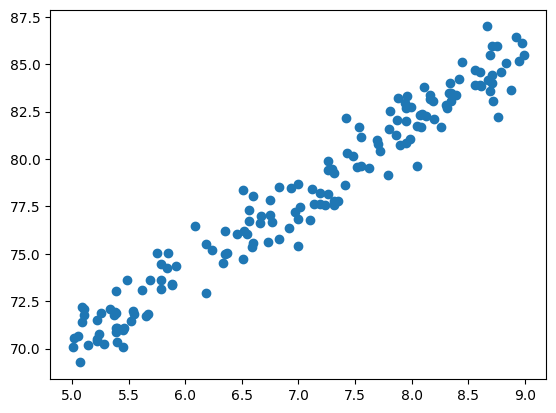

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
lr.predict(X_train)

array([76.06730978, 71.04649558, 78.86962468, 84.04612304, 80.03725589,
       82.21683415, 73.26499488, 84.55209657, 76.26191498, 71.12433766,
       77.85767764, 73.26499488, 80.69891358, 76.92357267, 78.0133618 ,
       76.41759914, 83.38446536, 79.33667717, 71.70815327, 70.3848379 ,
       83.2287812 , 84.04612304, 84.24072825, 71.28002182, 71.20217974,
       72.09736367, 82.37251831, 80.38754526, 80.77675566, 76.41759914,
       72.29196887, 71.51354806, 80.11509797, 80.65999254, 83.57907056,
       82.60604455, 83.2287812 , 81.32165022, 71.70815327, 72.33088991,
       77.70199347, 72.21412679, 82.87849184, 75.01644169, 77.95867274,
       80.11509797, 81.71086063, 81.67193959, 84.94130697, 71.66923223,
       82.06114999, 74.78291545, 77.95867274, 75.52241522, 79.18099301,
       78.9863878 , 76.06730978, 70.26807477, 75.44457314, 71.04649558,
       82.48928143, 81.08812398, 79.64804549, 71.74707431, 79.18099301,
       82.29467623, 84.82454385, 72.87578448, 77.07925683, 78.44

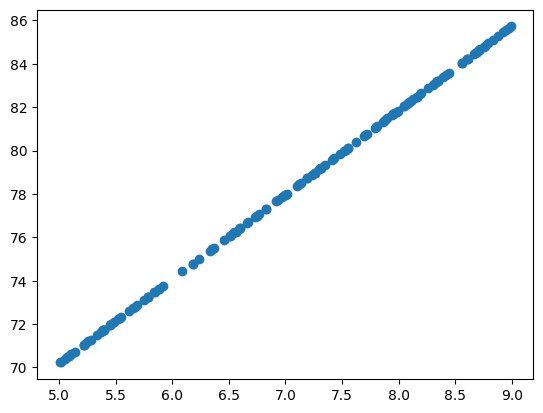

In [ ]:
plt.scatter(X_train, lr.predict(X_train))

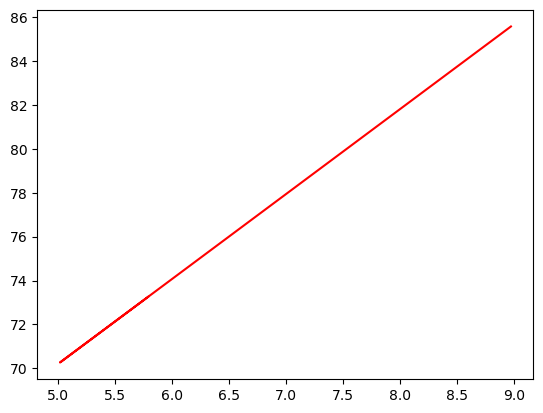

In [ ]:
plt.plot(X_train, lr.predict(X_train), 'r-') # reggression line print

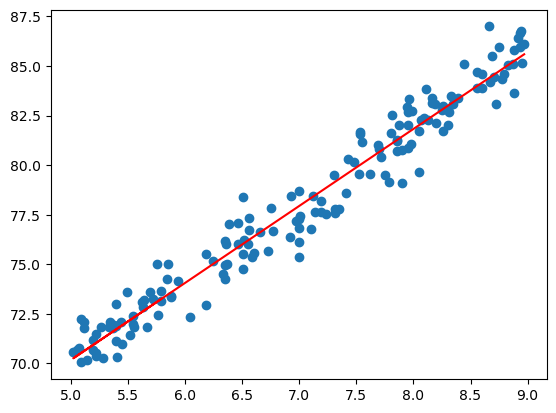

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

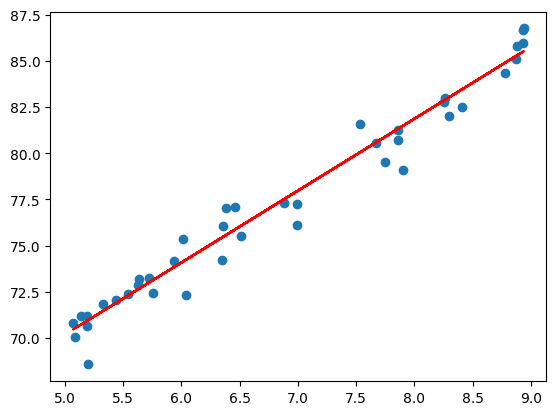

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

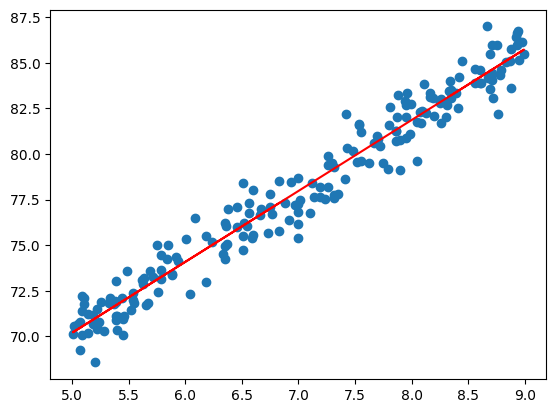

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")